In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Merging 12 months of Sales data into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [3]:
files = [file for file in os.listdir('./Sales_Data')]

#os.listdir - to get the list of all files and directories in the specified directory.

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_months_data = pd.DataFrame()
all_months_data

""


In [5]:
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

In [6]:
#dataframe containing all the data is converted to a csv file
all_months_data.to_csv('all_data.csv', index=False) 

In [7]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Data Cleaning

In [8]:
#To Drop rows with 'NaN' values

#Find rows with Nan values
nan_df = all_data[all_data.isna().any(axis=1)]

nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Drop the rows where all elements are missing.

all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
#Augment data with additional columns 
#i.e. to find the best month for sales, add a column of month


all_data['Month'] = all_data['Order Date'].str[0:2]          #since the date is a string

In [11]:
#Locate months with 'Or' values
all_data.loc[all_data['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [12]:
#remove rows with value 'Or' in the month column

all_data = all_data[all_data.Month != 'Or']

In [13]:
#Check if the above code has worked

all_data.loc[all_data['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


# What was the best month for sales? How much was earned that month?

In [14]:
#Convert the month values to int
all_data['Month'] = all_data['Month'].astype('int32')

In [15]:
#Calculate Sales

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float32')
all_data['Price Each'] = all_data['Price Each'].astype('float32')

#Adding sales column
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1.0,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1.0,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1.0,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1.0,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.970000
186846,259354,iPhone,1.0,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.000000
186847,259355,iPhone,1.0,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.000000
186848,259356,34in Ultrawide Monitor,1.0,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.989990


In [16]:
#Individual Maximum sale
all_data[all_data.Sales == all_data.Sales.max()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
4717,181069,Macbook Pro Laptop,2.0,1700.0,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.0
5219,181544,Macbook Pro Laptop,2.0,1700.0,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.0
92026,210292,Macbook Pro Laptop,2.0,1700.0,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0
127265,200528,Macbook Pro Laptop,2.0,1700.0,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.0


In [17]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1811768.375,1822256.75
2,13449.0,2188884.750,2202022.50
3,17005.0,2791207.750,2807100.25
4,20558.0,3367671.000,3390670.25
5,18667.0,3135125.000,3152606.75
6,15253.0,2562025.500,2577802.25
7,16072.0,2632539.500,2647775.75
8,13448.0,2230345.500,2244467.75
9,13109.0,2084992.125,2097560.00


In [18]:
#Finding the maximum sales month among all the months

max_sales_month = results[results.Sales == results.Sales.max()]
max_sales_month

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114.0,4588415.5,4613443.5


In [19]:
max_sales_month['Sales']

Month
12    4613443.5
Name: Sales, dtype: float32

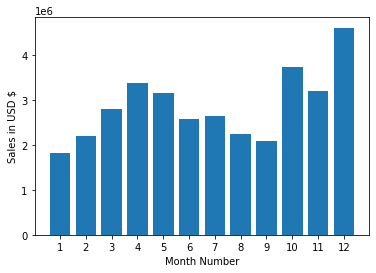

In [20]:
months = range(1,13)

plt.bar(months, results['Sales'])

plt.xticks(months)
#plt.yticks(results['Sales'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD $')

plt.show()